In [1]:
def plus_ten(x):
    return x + 10

print(plus_ten(1))

11


### 람다 표현식

In [2]:
plus_ten = lambda x : x + 10
plus_ten(1)

11

In [6]:
a = int(input())
print(type(a))
print(a+1000)

1234
<class 'int'>
2234


In [11]:
a,b = input().split()
a = int(a)
b = int(b)
print(a+b)

12 34
46


In [12]:
a,b = map(int, input().split())
print(a+b)

12 34
46


In [16]:
a,b = "12 34".split()
print(a,b)

12 34


In [19]:
def plus_ten(x):
    return x + 10

a,b,c = map(plus_ten, [1, 2, 3])
print(a,b,c)

11 12 13


In [20]:
a,b,c = map(lambda x:x+10, [1, 2, 3])
print(a,b,c)

11 12 13


In [22]:
a = 12
if a>10:
    print(True)
else:
    print(False)

True


In [23]:
a = 12
True if a>10 else False

True

In [24]:
a = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
list(map(lambda x : str(x) if x%3 == 0 else x, a))

[1, 2, '3', 4, 5, '6', 7, 8, '9', 10]

In [25]:
a = [1, 2, 3, 4, 5]
b = [6, 7, 8, 9, 10]
list(map(lambda x,y : x * y, a, b))

[6, 14, 24, 36, 50]

In [28]:
def foo(x,y):
    return x*y

a = [1, 2, 3, 4, 5]
b = [6, 7, 8, 9, 10]
temp = []
for x,y in zip(a,b):
    temp.append(foo(x,y))
temp

[6, 14, 24, 36, 50]

In [35]:
def f(x):
    return x > 5 and x < 10

a = [8, 3, 2, 10, 15, 7, 1, 9, 0, 11]
b = []
for i, x in enumerate(a):
    if f(x):
        b.append(a[i])
b

[8, 7, 9]

In [38]:
a = [5,3,4,1,2]
for i, x in enumerate(a):
    print(i, x)

0 5
1 3
2 4
3 1
4 2


In [36]:
def f(x):
    return x > 5 and x < 10

a = [8, 3, 2, 10, 15, 7, 1, 9, 0, 11]
list(filter(f, a))

[8, 7, 9]

In [39]:
a = [8, 3, 2, 10, 15, 7, 1, 9, 0, 11]
list(filter(lambda x:x > 5 and x < 10, a))

[8, 7, 9]

### 변수의 사용 범위

In [40]:
x = 10
def foo():
    print(x)
    
foo()
print(x)

10
10


In [41]:
def foo():
    x = 20
    print(x)
    
foo()
print(x)

20
10


In [42]:
def foo():
    global x
    x = 20
    print(x)
    
foo()
print(x)

20
20


### 클로져 사용하기

In [44]:
def bar():
    print("bar()")
    
def foo():
    bar()
    print("foo()")

foo()

bar()
foo()


In [46]:
def foo():
    def bar():
        print("bar()")
    print("foo()")
    bar()

foo()

foo()
bar()


In [48]:
def print_hello():
    hello = 'Hello, world!'
    def print_message():
        print(hello)
    print_message()
    
print_hello()

Hello, world!


In [50]:
def A():
    x = 10
    def B():
        x = 20
        print("B():", x)
    
    B()
    print(x)
    
A()

B(): 20
10


In [51]:
def A():
    x = 10
    def B():
        nonlocal x
        x = 20
        print("B():", x)
    
    B()
    print(x)
    
A()

B(): 20
20


In [52]:
def A():
    x = 10
    y = 100
    def B():
        x = 20
        def C():
            nonlocal x
            nonlocal y
            x = x + 30
            y = y + 300
            print(x)
            print(y)

        C()    
    B()
    
A()


50
400


In [53]:
x = 1
def A():
    x = 10
    y = 100
    def B():
        x = 20
        def C():
            global x
            x = x + 30
            print(x)

        C()    
    B()
A()


31


In [54]:
def calc():
    a = 3
    b = 5
    def mul_add(x):
        return a*x + b  # a = dy/dx
    return mul_add

c = calc()
print(c(1),c(2),c(3))

8 11 14


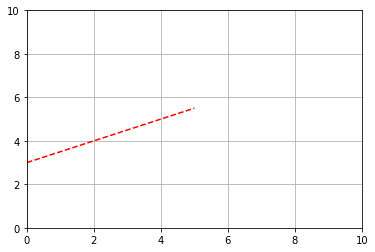

In [71]:
from matplotlib import pyplot as plt

def calc():
    a = 0.5
    b = 3
    def mul_add(x):
        return a*x + b  # a = dy/dx
    return mul_add

x = [0, 1, 2, 3, 4, 5]
y = [0, 0, 0, 0, 0, 0]

c = calc()
for i, data in enumerate(x):
    y[i] = c(data)

plt.plot(x, y ,'r--')
plt.grid()
plt.xlim(0,10)
plt.ylim(0,10)
plt.show()

In [72]:
def calc():
    a = 3
    b = 5
    return lambda x : a*x + b

c = calc()
print(c(1),c(2),c(3))

8 11 14


In [78]:
def calc():
    a = 3
    b = 5
    total = 0
    def mul_add(x):
        nonlocal total
        total += a*x + b 
        return total
    return mul_add

c = calc()
print(c(1),c(2),c(3),c(99))


8 19 33 335


In [74]:
def counter():
    i = 0
    def count():
        nonlocal i
        i += 1
        return i
    return count

c = counter()
for i in range(10):
    print(c(), end=' ')

1 2 3 4 5 6 7 8 9 10 

### 연습문제 1번

In [77]:
def calc(score):
    a = score[0]
    b = score[0]
    c = 0
    
    for x in score:
        c += x
        if a < x :
            a = x
        if b > x : 
            b = x

    d = c / len(score)
    return a,b,c,d

score = [ 67, 45, 89, 99, 65, 64, 56, 78, 88, 97 ]
a,b,c,d = calc(score)
print("최대값=%d, 최소값=%d, 총점=%d, 평균=%5.2f"%(a,b,c,d))

최대값=99, 최소값=45, 총점=748, 평균=74.80


### 연습문제 2번

In [79]:
def is_palindrome(word):
    if len(word) < 2:
        return True
    if word[0] != word[-1]:
        return False
    return is_palindrome(word[1:-1])

print(is_palindrome("hello"))
print(is_palindrome("level"))

False
True


### 연습문제 3번

In [82]:
files = ['font', '1.png', '10.jpg', '11.gif', '2.jpg', '3.bmp']

# def foo(fname):
#     return fname[-4:] == '.png' or fname[-4:] == '.jpg'

temp = list( filter( lambda x:x[-4:] == '.png' or x[-4:] == '.jpg', files) ) 

print(temp)


['1.png', '10.jpg', '2.jpg']


### 연습문제 4번

In [84]:
def countdown(n):
    temp = n+1
    def count():
        nonlocal temp
        temp -= 1
        return temp
    return count

    
n = int(input())  # 10
c = countdown(n)
for i in range(n):
    print(c(), end=' ')

10
10 9 8 7 6 5 4 3 2 1 

## 파이썬 객체지향

In [87]:
#ver 0.1
kor = 0
eng = 0
total = 0
aver = 0.0

kor, eng = map( int, input("성적입력 : ").split())
total = kor + eng
aver  = total / 2

print("국어=%d, 영어=%d, 총점=%d, 평균=%5.2f"%(kor, eng, total, aver))

성적입력 : 45 56
국어=45, 영어=56, 총점=101, 평균=50.50


In [88]:
#ver 0.2

def score_input():
    kor, eng = map( int, input("성적입력 : ").split())
    return kor, eng

def score_calc(kor, eng):
    total = kor + eng
    aver  = total / 2
    return total, aver

def score_output(kor, eng, total, aver):
    print("국어=%d, 영어=%d, 총점=%d, 평균=%5.2f"%(kor, eng, total, aver))
    
kor, eng = score_input()
total, aver = score_calc(kor, eng)
score_output(kor, eng, total, aver)

성적입력 : 67 78
국어=67, 영어=78, 총점=145, 평균=72.50


In [89]:
#ver 0.3

def score_input():
    kor, eng, math = map( int, input("성적입력 : ").split())
    return kor, eng, math

def score_calc(kor, eng, math):
    total = kor + eng + math
    aver  = total / 3
    return total, aver

def score_output(kor, eng, math, total, aver):
    print("국어=%d, 영어=%d, 수학=%d, 총점=%d, 평균=%5.2f"%(kor, eng, math, total, aver))
    
kor, eng, math = score_input()
total, aver = score_calc(kor, eng, math)
score_output(kor, eng, math, total, aver)

성적입력 : 34 45 56
국어=34, 영어=45, 수학=56, 총점=135, 평균=45.00


In [92]:
#ver 0.4

def score_input(my_score):
    my_score['kor'], my_score['eng'], my_score['math'] = map( int, input("성적입력 : ").split())

def score_calc(my_score):
    my_score['total'] = my_score['kor'] + my_score['eng'] + my_score['math']
    my_score['aver']  = my_score['total'] / 3

def score_output(my_score):
    print("국어=%d, 영어=%d, 수학=%d, 총점=%d, 평균=%5.2f"%
          (my_score['kor'], my_score['eng'] , my_score['math'], my_score['total'], my_score['aver'])) 
    
my_score = { 'kor':0, 'eng':0, 'math':0, 'total':0, 'aver':0.0 }
score_input(my_score)
score_calc(my_score)
score_output(my_score)

성적입력 : 67 78 89
국어=67, 영어=78, 수학=89, 총점=234, 평균=78.00


In [93]:
#ver 0.5

class Score:
    def __init__(self):
        self.kor = 0
        self.eng = 0
        self.math = 0
        self.total = 0
        self.aver = 0.0
        
    def score_input(self):
        self.kor, self.eng, self.math = map( int, input("성적입력 : ").split())

    def score_calc(self):
        self.total  = self.kor + self.eng + self.math 
        self.aver  = self.total/ 3

    def score_output(self):
        print("국어=%d, 영어=%d, 수학=%d, 총점=%d, 평균=%5.2f"%
              (self.kor, self.eng, self.math , self.total , self.aver )) 
    
my_score = Score()
my_score.score_input()
my_score.score_calc()
my_score.score_output()

성적입력 : 45 56 67
국어=45, 영어=56, 수학=67, 총점=168, 평균=56.00
